In [1]:
import splitfolders

In [3]:
import os

In [3]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')

In [5]:
loc = 'dataset/'

splitfolders.ratio(loc, output='output', seed=1337, ratio=(0.7, 0.3))

In [1]:
data_dir='C:\\Users\\Gamer\\pothole\\output'

In [4]:
os.listdir(data_dir)

['train', 'val']

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
train_path=data_dir +'\\train\\'
test_path=data_dir +'\\val\\'

In [7]:
os.listdir(train_path+'potholethermalimages')[0]

'imgonline-com-ua-thermal0Wl7RJ8s6Lev.jpg'

In [8]:
pothole=train_path+'potholethermalimages\\'+'imgonline-com-ua-thermal0Wl7RJ8s6Lev.jpg'

In [9]:
pothole_img=imread(pothole)

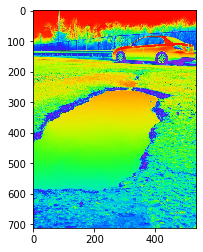

In [10]:
plt.imshow(pothole_img)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.1,
                               horizontal_flip=True, 
                               fill_mode='nearest' )

In [13]:
image_gen.flow_from_directory(train_path)

Found 56 images belonging to 2 classes.


In [14]:
image_gen.flow_from_directory(test_path)

Found 24 images belonging to 2 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [16]:
image_shape=(300,300,3)

In [17]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 156800)            0

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
batch_size = 16

In [24]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 56 images belonging to 2 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 24 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'nonpotholethermalimages': 0, 'potholethermalimages': 1}

In [27]:
results = model.fit_generator(train_image_gen,epochs=15, validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/15
4/4 [==============================] - 15s 4s/step - loss: 2.3124 - accuracy: 0.4643 - val_loss: 1.0900 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 14s 4s/step - loss: 0.9458 - accuracy: 0.6071 - val_loss: 0.6999 - val_accuracy: 0.5417
Epoch 3/15
4/4 [==============================] - 13s 3s/step - loss: 0.6241 - accuracy: 0.6071 - val_loss: 0.5355 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 15s 4s/step - loss: 0.6472 - accuracy: 0.6250 - val_loss: 0.5094 - val_accuracy: 0.7500
Epoch 5/15
4/4 [==============================] - 14s 3s/step - loss: 0.5399 - accuracy: 0.6607 - val_loss: 0.4542 - val_accuracy: 0.6667
Epoch 6/15
4/4 [==============================] - 14s 3s/step - loss: 0.5339 - accuracy: 0.7500 - val_loss: 0.4839 - val_accuracy: 0.8333
Epoch 7/15
4/4 [==============================] - 14s 3s/step - loss: 0.4275 - accuracy: 0.8036 - val_loss: 0.4870 - val_accuracy: 0.7083


In [28]:
loss=pd.DataFrame(model.history.history)

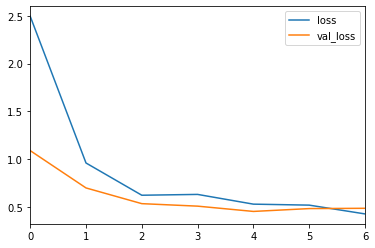

In [29]:
loss[['loss','val_loss']].plot()

In [31]:
pred_probabilities = model.predict_generator(test_image_gen)

In [32]:
predictions = pred_probabilities > 0.5

In [33]:
predictions

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [34]:
from tensorflow.keras.preprocessing import image

In [35]:
pothole

'C:\\Users\\Gamer\\pothole\\output\\train\\potholethermalimages\\imgonline-com-ua-thermal0Wl7RJ8s6Lev.jpg'

In [36]:
my_image=image.load_img(pothole,target_size=image_shape)

In [37]:
my_image=image.img_to_array(my_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


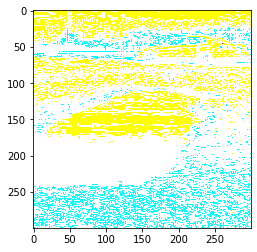

In [38]:
plt.imshow(my_image)

In [39]:
my_image = np.expand_dims(my_image, axis=0)

In [40]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [41]:
os.listdir(test_path + 'nonpotholethermalimages')[5]

'kako-9gO98KykwpGFKrei.jpg'

In [42]:
plain=test_path + 'nonpotholethermalimages\\'+'kako-9gO98KykwpGFKrei.jpg'

In [43]:
plain

'C:\\Users\\Gamer\\pothole\\output\\val\\nonpotholethermalimages\\kako-9gO98KykwpGFKrei.jpg'

In [44]:
my_image2=image.load_img(plain, target_size=image_shape)

In [46]:
my_image2=image.img_to_array(my_image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


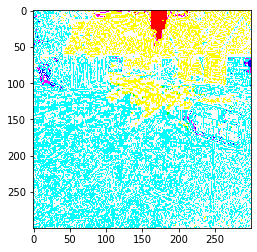

In [47]:
plt.imshow(my_image2)

In [48]:
my_image2=np.expand_dims(my_image2, axis=0)

In [49]:
model.predict(my_image2)

array([[0.]], dtype=float32)